# Plot size distribution - Casy counter 
### Gabi - 10/05/2016
Jens Hahn - 21/08/2016

## 1. <a href=#readdata>Read </a>*Excel* sheet in *pandas*
## 2. <a href=#heatmap> Plot </a> heatmap of size distribution 

### Import packages
1. **matplotlib** for plotting 
2. **pandas** for data analysis

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import numpy as np
import scipy as sci

<a name='readdata' />

### Read *Excel* sheet in *pandas*
Prepare lists and Series for plotting

In [4]:
# load Excel sheet in pandas Dataframe
df = pd.read_excel('./100516_Casy_Eluriation.xlsx', sheetname='Tabelle3')

In [5]:
# get size column
sizes = df.columns[7:]
# get data, remove metainformation
df_times = df.set_index('Time')
df_times = df_times[sizes]
df_times = df_times.T

In [6]:
# get sample names and time points
sample_names = list(df_times.columns)
sample_names[0] = '0A'
sample_names[1] = '0B'
time_names = list(df_times.index)

<a name='heatmap' />

## Plot heat map of size distribution

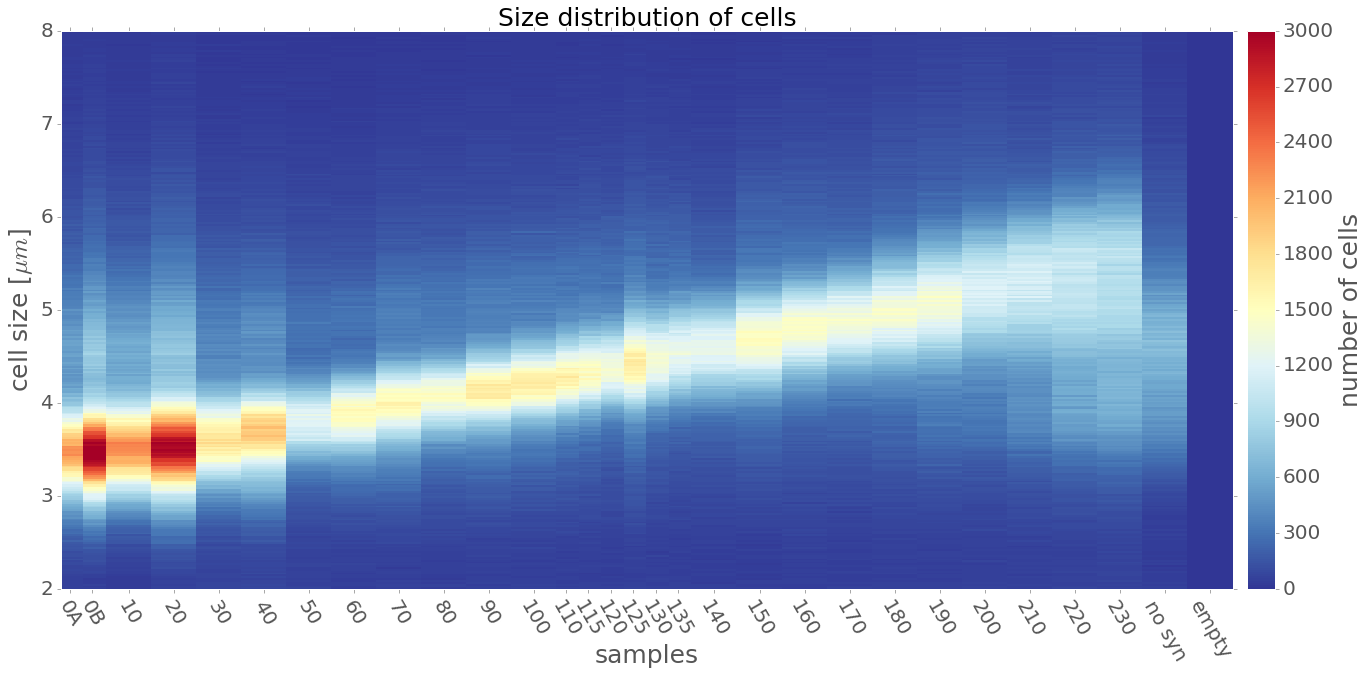

In [7]:
mpl.style.use('bmh')  # plot in different style

# transform data for matrix of heatmap
df_heat = df_times
df_heat.columns = sample_names
df_heat = df_heat.T

# create matrix
heat_z = []
for name in df_heat.columns:
    heat_z.append(list(df_heat[name]))

# get numerical values for x axis (not equidistant)
heat_x = [el for el in df_times.columns]
heat_x[0] = 0
heat_x[1] = 5
heat_x[-2] = 240
heat_x[-1] = 250

# get sizes of cells (columns in Dataframe)
sizes = df.columns[7:]
sizes = list(sizes)
# append values for pcolormesh (needs X,Y > Z)
sizes.append(20.01)
heat_x.append(260)
# rename sample non-synchronised
sample_names[-2] = 'no syn'

# get actual plot
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
# select colormap
cmap = mpl.cm.RdYlBu_r
# make heatmap
im = ax.pcolormesh(heat_x, sizes, heat_z, 
                   cmap=cmap,  # colormap
                   vmin=0, vmax=3000, )  # min and max value
# set axis ranges
ax.set_ylim(2,8)
ax.set_xlim(0,260)
# push x ticks to the center of the columns
heat_ticks = [(el+heat_x[i+1])/2 for i, el in enumerate(heat_x) if el != 260]
# set ticks and labels 
ax.xaxis.set(ticks=heat_ticks, ticklabels=sample_names)
# set labels again?!, only way to get rotation
ax.set_xticklabels(sample_names, rotation=-60)
# set axis labels, titles and sizes
ax.set_xlabel('samples', fontsize=25, labelpad=-20)
ax.set_ylabel('cell size [$\mu m$]', fontsize=25)
ax.tick_params(labelsize=20)
ax.set_title('Size distribution of cells', fontsize=25)

# set colorbar and move to the left
cb = fig.colorbar(im,ax=ax, pad=0.01)
cb.set_label('number of cells', fontsize=25)
cb.ax.tick_params(labelsize=20)
# save figure
fig.savefig('heatmap.pdf')

